In [21]:
def calculateDecodingProbability(n, q, k):
    if n < k:
        return 0
    num, den = 1, 1
    for i in range(0, k):
        num *= (1 - q**(i - n))
        den *= (1 - q**(i - n + 1))
    return 1 - (1 - num)/(1 - den)

print(calculateDecodingProbability(20, 2, 20))
print(calculateDecodingProbability(20, 4, 20))

0.2887883704965667
0.6885375371205485


In [4]:
def probabilityOfAtleast2ErrorsOutOf4(propabilityOfError):
    return 1 - (1 - propabilityOfError)**4 - 4 * propabilityOfError * (1 - propabilityOfError)**3

def alternativeFunction(probabilityOfError):
    return 6 * probabilityOfError**2 * (1 - probabilityOfError)**2 + 4 * probabilityOfError**3 * (1 - probabilityOfError) + probabilityOfError**4

print(probabilityOfAtleast2ErrorsOutOf4(0.25))
print(alternativeFunction(0.35))

0.26171875
0.43701874999999996


In [2]:
# Given a probability of error p, number of links n. What is the probability of at least k errors out of n links?
def binomial(n, k):
    if k == 0 or k == n:
        return 1
    return binomial(n - 1, k - 1) + binomial(n - 1, k)

def probabilityOfAtleastKErrorsOutofN(probabilityOfError, n, k):
    ans = 0
    for i in range(k, n + 1):
        ans += binomial(n, i) * probabilityOfError**i * (1 - probabilityOfError)**(n - i)
    return ans

print(probabilityOfAtleastKErrorsOutofN(0.25, 25, 6))

0.6217214883623932


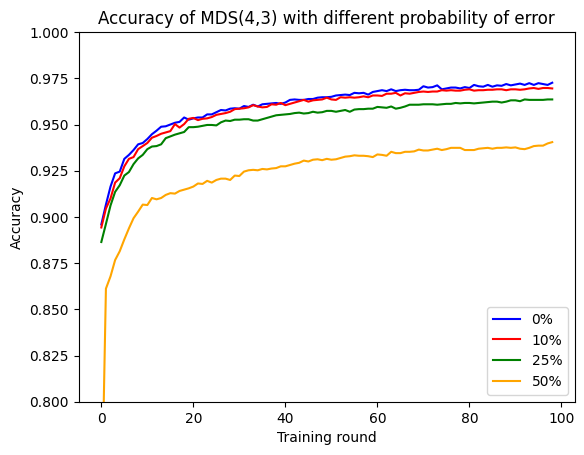

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

acc0 = pd.read_csv('./output/mds/acc0.csv')
acc10 = pd.read_csv('./output/mds/acc10.csv')
acc25 = pd.read_csv('./output/mds/acc25.csv')
acc50 = pd.read_csv('./output/mds/acc50.csv')

plt.plot(acc0, color="blue")
plt.plot(acc10, color="red")
plt.plot(acc25, color="green")
plt.plot(acc50, color="orange")
plt.xlabel("Training round")
plt.ylabel("Accuracy")
plt.title("Accuracy of MDS(4,3) with different probability of error")
plt.legend(["0%", "10%", "25%", "50%"])
plt.ylim(0.8, 1)
plt.show()

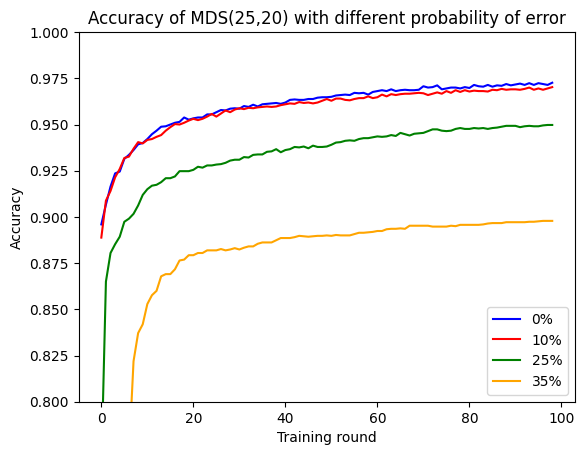

In [6]:
acc0 = pd.read_csv('./output/mds/acc0.csv')
acc10 = pd.read_csv('./output/mds_prob/acc10.csv')
acc25 = pd.read_csv('./output/mds_prob/acc25.csv')
acc35 = pd.read_csv('./output/mds_prob/acc35.csv')

plt.plot(acc0, color="blue")
plt.plot(acc10, color="red")
plt.plot(acc25, color="green")
plt.plot(acc35, color="orange")
plt.xlabel("Training round")
plt.ylabel("Accuracy")
plt.title("Accuracy of MDS(25,20) with different probability of error")
plt.legend(["0%", "10%", "25%", "35%"])
plt.ylim(0.8, 1)
plt.show()

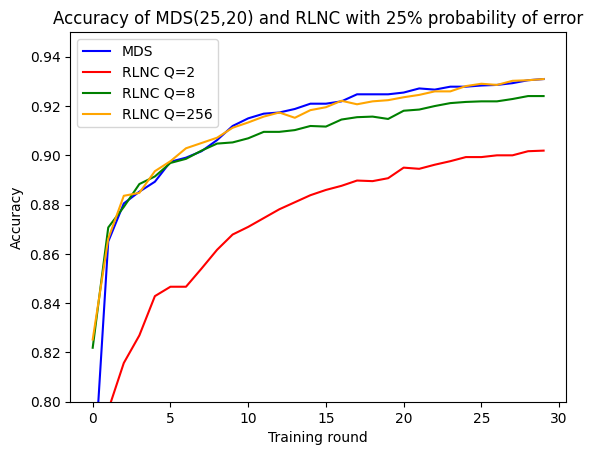

In [10]:
mds = pd.read_csv('./output/mds_prob/acc25.csv')
rlnc2 = pd.read_csv('./output/rlnc/Q2/acc25.csv')
rlnc8 = pd.read_csv('./output/rlnc/Q8/acc25.csv')
rlnc256 = pd.read_csv('./output/rlnc/Q256/acc25.csv')

plt.plot(mds[0:30], color="blue")
plt.plot(rlnc2[0:30], color="red")
plt.plot(rlnc8[0:30], color="green")
plt.plot(rlnc256[0:30], color="orange")
plt.xlabel("Training round")
plt.ylabel("Accuracy")
plt.title("Accuracy of MDS(25,20) and RLNC with 25% probability of error")
plt.legend(["MDS", "RLNC Q=2", "RLNC Q=8", "RLNC Q=256"])
plt.ylim(0.8, 0.95)
plt.show()

Text(0, 0.5, 'Expected number of clinet-helper transmissions')

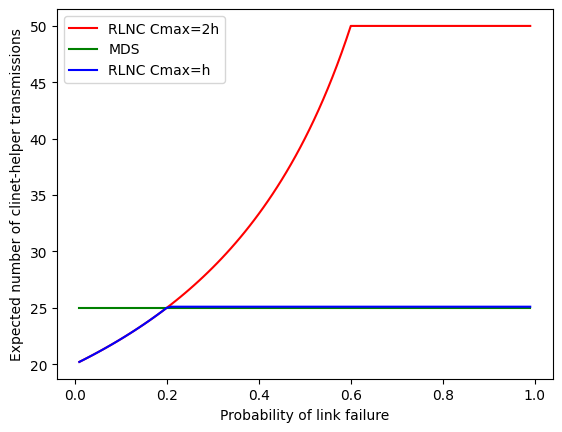

In [11]:
import matplotlib.pyplot as plt

errors = []
for i in range(1, 100):
    errors.append(i/100)

overlapping = 0.6
Th = [min(20/(1-p), 25.1) for p in errors]
T2h = [min(20/(1-p), 50) for p in errors]
MDS = [25 for p in errors]
plt.plot(errors, T2h, color="red")
plt.plot(errors, MDS, color="green")
plt.plot(errors, Th, color="blue")
plt.legend(["RLNC Cmax=2h", "MDS", "RLNC Cmax=h"])
plt.xlabel("Probability of link failure")
plt.ylabel("Expected number of clinet-helper transmissions")

(0.8, 1.0)

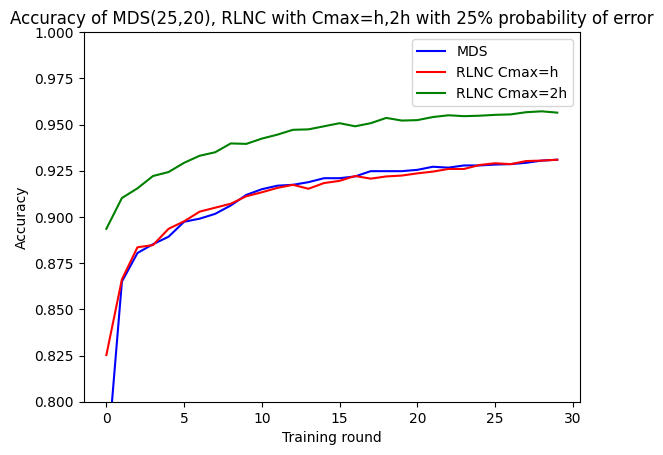

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

mds = pd.read_csv('./output/mds_prob/acc25.csv')
rlnc256 = pd.read_csv('./output/rlnc/Q256/acc25.csv')
hybrid = pd.read_csv('./output/hybrid/Cmax2/acc25.csv')

plt.plot(mds[0:30], color="blue")
plt.plot(rlnc256[0:30], color="red")
plt.plot(hybrid[0:30], color="green")
plt.xlabel("Training round")
plt.ylabel("Accuracy")
plt.title("Accuracy of MDS(25,20), RLNC with Cmax=h,2h with 25% probability of error")
plt.legend(["MDS", "RLNC Cmax=h", "RLNC Cmax=2h"])
plt.ylim(0.8, 1)